# Etude de la gravitationnale collapse


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Constantes
G = 6.67430e-11  # m³/(kg·s²)
c = 2.99792458e8  # m/s
M_sun = 1.989e30  # kg
R_sun = 6.96e8    # m

In [5]:
def schwarzschild_radius(M):
    """r_s = 2GM/c2"""
    return 2 * G * M / c**2


## Etude statique et systeme tos

## Etude de la dynamique de la surface--chute libre

Etudions dans un premier temps dans la coordonée temporelle de Schwarzchild la dynamique de la surface. A la surface, comme la masse contenue par dessous est constante et que l'on suppose le vide à l'exterieur, on a simplement a étudier une chute libre. On suit encore une metrique de schwarzchild par le theoreme de OIEggfhoz
$$ds^2 = -\left(1 - \frac{2GM}{rc^2}\right)c^2dt^2 + \left(1 - \frac{2GM}{rc^2}\right)^{-1}dr^2 + r^2d\Omega^2$$

### Equations générales

On commence par se doter du lagrangien correspondant : $\mathcal{L}=\sqrt{-g_{\mu\nu}u^{\mu}u^{\nu}}$ que l'on parametrise par $\tau$ par soucis de convenance. On a donc $\mathcal{L}=\sqrt{\frac{d^2s}{d\lambda^2}}=c$. En y injectant la metrique de Schwarzchild :
$$\mathcal{L} = \sqrt{\left(1 - \frac{R_s}{r}\right)c^2\dot{t}^2 - \left(1 - \frac{R_s}{r}\right)^{-1}\dot{r}^2 - r^2\frac{d\Omega^2}{d\lambda^2}}$$

On se ramène au cas $\theta = \phi=0$ par changement de coordonnées, on obtient :

$$\frac{d}{d\lambda}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}^\mu}\right) = \frac{\partial \mathcal{L}}{\partial x^\mu} \implies 
\begin{cases} 
\frac{1}{2}\left(\frac{dr}{d\lambda}\right)^2 + V(r) = \frac{1}{2}\left(\frac{\epsilon^2}{c^2} - c^2\right) \\ 
V(r) = -\frac{GM}{r} + \frac{l^2}{2r^2} - \frac{GMl^2}{r^3c^2} 
\end{cases}$$

où $\epsilon$ et $l$ sont des constantes du mouvement données par :
$$\begin{cases} 
l = r^2\dot{\phi} \\ 
\frac{\epsilon}{c^2} = \left(1 - \frac{R_s}{r}\right)\dot{t} 
\end{cases}$$

### Cas $l=0$ et $u^r_0=0$

Dans le cas particulier où $l = v_0^\phi = 0$, on a $e = c^2 \sqrt{1 - \frac{R_s}{r_0}}$.  
Après manipulations, on a :

$$
\begin{cases} 
\frac{dr}{d\tau} = -c \sqrt{\frac{R_s}{r} - \frac{R_s}{r_0}} & (1) \\ 
\frac{dt}{d\tau} = \frac{\sqrt{1 - \frac{R_s}{r_0}}}{1 - \frac{R_s}{r}} & (2) 
\end{cases}
$$

On intègre $(1)$ en posant $\tau(0) = 0$ :

$$c\tau = -\int_{r_0}^{r} \frac{dr}{\sqrt{\frac{R_s}{r} - \frac{R_s}{r_0}}}$$

En posant : 
$\begin{cases} r = r_0 \sin^2 \theta \\ dr = 2r_0 \cos \theta \sin \theta \, d\theta \end{cases}$

$$c\tau = -2r_0 \sqrt{\frac{r_0}{R_s}} \int_{\arcsin \sqrt{\frac{r}{r_0}}}^{\pi/2} \sin^2 \theta \, d\theta$$

D'où :

$$\tau = \frac{1}{c} r_0 \sqrt{\frac{r_0}{R_s}} \left[ \arccos \sqrt{\frac{r}{r_0}} + \sqrt{\frac{r}{r_0}} \sqrt{1 - \frac{r}{r_0}} \right] \quad (3)$$

Pour avoir l'allure de cette solution traçons la :
    On definit la fonction $\texttt{ff\_proper\_time}$

In [6]:
def ff_proper_time(r0, r, M):
    """tau = r0/c * sqrt(r0/r_s)[pi/2 - arcsin(sqrt(r/r0))+sqrt(r/r0)*sqrt(1-r/r0)]"""
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    # Protéger contre les valeurs invalides
    x = np.clip(r / r0, 0, 1)  # Garder 0 <= r/r0 <= 1
    
    with np.errstate(divide='ignore', invalid='ignore'):
        result = r0 / c * np.sqrt(r0/r_s) * (np.pi/2 - np.arcsin(x) + x * np.sqrt(1 - x**2))
    
    return result

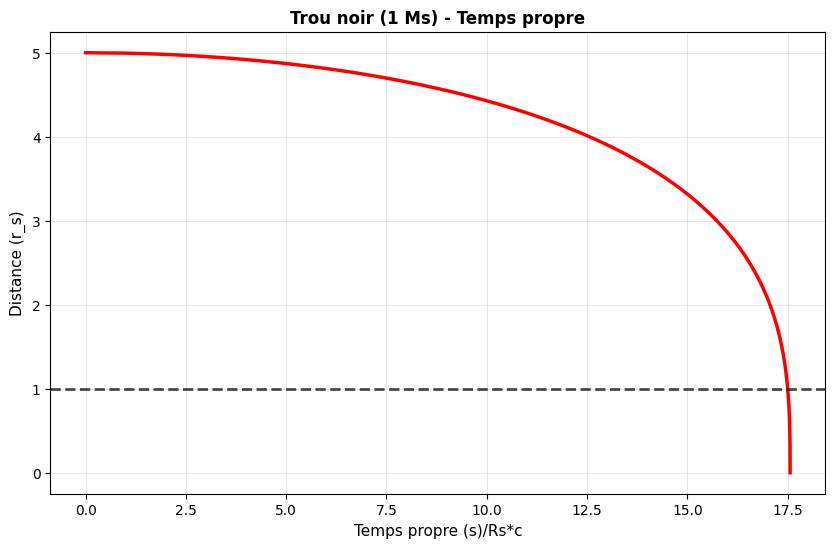

In [8]:
# Tracé du temps propre pour un trou noir de 1 masse solaire

fig ,ax = plt.subplots(figsize=(10, 6))
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s*0.001, 1000)  # Decroissant de 5*r_s a r_s
tau_bh = ff_proper_time(5*r_s, r_bh, M_bh)
ax.plot(tau_bh/r_s*c, r_bh/r_s, 'r-', linewidth=2.5)
ax.axhline(1, color='black', linestyle='--', linewidth=2, alpha=0.7)
ax.set_xlabel('Temps propre (s)/Rs*c', fontsize=11)
ax.set_ylabel('Distance (r_s)', fontsize=11)
ax.set_title('Trou noir (1 Ms) - Temps propre', fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

On voit que l'observateur rentre bien dans une zone ou $r<R_s$ et sa chute saccelerre de facon tres importante. Mais n'oublions pas notre objectif : nous voulons conniatre $t(r)$ pour savoir ce que percoit un observateur a l'infini par exemple.

On a toujours l'equation implicite :$$\frac{dt}{d\tau} = \frac{\sqrt{1 - \frac{R_s}{r_0}}}{1 - \frac{R_s}{r}}$$
Si son integration peut parrraitre allechante ou l'on procede similairement que pour $\tau$ il est preferable de proceder par integration numérique : 

On definit la fonction $\texttt{ff\_cordinate\_time}$

In [10]:
def ff_cordinate_time(r0, r, M):
    """
    Calcul du temps coordonné par intégration numérique.
    r décroît de r0 vers r_s
    dt/dr = sqrt(1-r_s/r0) / (1-r_s/r) * (-1/(c*sqrt(r_s/r - r_s/r0)))
    """
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    # Vérification: r0 doit être > r_s
    if r0 <= r_s:
        raise ValueError(f"r0 ({r0}) doit être > r_s ({r_s})")
    
    with np.errstate(divide='ignore', invalid='ignore'):
        # r_s/r - r_s/r0 > 0 quand r < r0 (descente)
        sqrt_arg = r_s / r - r_s / r0
        sqrt_arg = np.clip(sqrt_arg, 1e-10, None)
        
        # dt/dr négatif (r décroît)
        dt_dr = np.sqrt(1 - r_s/r0) / (1 - r_s/r) * (-1) / (c * np.sqrt(sqrt_arg))
        
        # Intégration (valeur absolue pour temps positif)
        dr = np.gradient(r)
        t_coord = np.cumsum((dt_dr * dr))
        t_coord = t_coord - t_coord[0]
    
    return t_coord


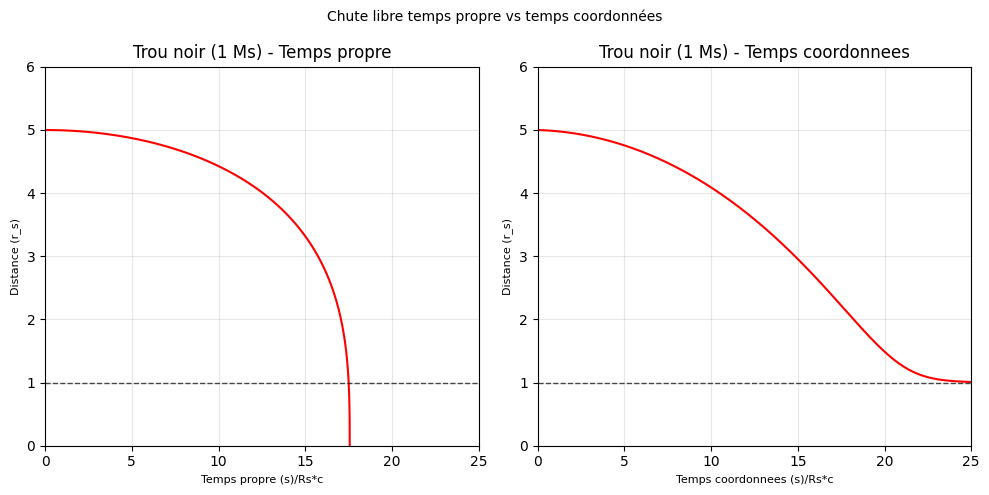

In [ ]:
# Tracé du temps coordonné pour un trou noir de 1 masse solaire et comparaison avec le temps propre
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Chute libre temps propre vs temps coordonnées', fontsize=10)

# Trou noir 1 M☉ - proper time
ax = axes[0]
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s*0.001, 1000)  
tau_bh = ff_proper_time(5*r_s, r_bh, M_bh)
ax.plot(tau_bh/r_s*c, r_bh/r_s, 'r-', linewidth=1.5)
ax.axhline(1, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.set_xlabel('Temps propre (s)/Rs*c', fontsize=8)
ax.set_ylabel('Distance (r_s)', fontsize=8)
ax.set_title('Trou noir (1 Ms) - Temps propre')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 25)
ax.set_ylim(0, 6)


# Trou noir 1 M☉ - coordinate time
ax = axes[1]
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s, 1000)  
t_coord = ff_cordinate_time(5*r_s, r_bh, M_bh)
ax.plot(t_coord/r_s*c, r_bh/r_s, 'r-', linewidth=1.5)
ax.axhline(1, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.set_xlabel('Temps coordonnees (s)/Rs*c', fontsize=8)
ax.set_ylabel('Distance (r_s)', fontsize=8)
ax.set_title('Trou noir (1 Ms) - Temps coordonnees')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 25)
ax.set_ylim(0, 6)


plt.tight_layout()
plt.show()

Une fois que ces resultats premilinaires etablis, on appercoit que pour decrire de maniere generale la chute libre de la surface dans un systeme de coordonées plus generale que le temps propre, les coordonées classiques amenent à des cas pathologiques. Tracons les geodesiques pour s'en rendre compte encore mieux. D'un point de vue naif on sattend a ce que la lumiere puisse "s'echapper" que lorsque $r>R_s$ et qu'un photon plongeant dans le trou noir le penetre reelement.

### Geodesiques

Traçons donc les cones de lumieres dans les coordonére classiques qui sont definies par $ds^2=0$ ou :
$$\frac{1}{c}\frac{dr}{dt}=\pm\left|1-\frac{R_s}{r}\right|$$

Cela amene techniquement a qutre solutions que l'on divise comme suit :

$r>R_s$ : $$r-r_0+R_s \ln{\frac{r-R_s}{r_0-R_s}}=c(t-t_0) \quad \text{et} \quad r-r_0-R_s \ln{\frac{r-R_s}{r_0-R_s}}=c(t-t_0)$$

$r<R_s$ : $$r-r_0-R_s \ln{\frac{R_s-r}{R_s-r_0}}=c(t-t_0) \quad \text{et} \quad r-r_0+R_s \ln{\frac{R_s-r}{R_s-r_0}}=c(t-t_0)$$

Ces equations definissent les parties rentrantes et sortantes de nos cones de lmumieres pour les deux differentes situations. Implementons cela avec les fonctions $\texttt{schwarzchild\_geo\_p(m)}$ et $\texttt{schwarzchild\_geo\_p(m)\_inf}$:

In [ ]:
# Géodésiques nulles (lumière) dans le champ de Schwarzschild

def schwarzchild_geo_p(t0,r0, r, M):
    """Géodésique nulle sortantes: t augmente quand r augmente"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0+ (r-r0) / c + r_s/c*np.log((r-r_s)/(r0-r_s))
    return t

def schwarzchild_geo_m(t0,r0, r, M):
    """Géodésique nulle entrante: t augmente quand r diminue"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    
    t = t0 + (r0 - r) / c - r_s/c*np.log(np.abs((r-r_s)/(r0-r_s)))
    return t

def schwarzchild_geo_p_inf(t0,r0, r, M):
    """Géodésique nulle sortantes: t augmente quand r augmente"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0+ (r0-r) / c + r_s/c*np.log((r_s-r)/(-r0+r_s))
    return t

def schwarzchild_geo_m_inf(t0,r0, r, M):
    """Géodésique nulle entrante: t augmente quand r diminue"""
    
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0 + (r - r0) / c - r_s/c*np.log(np.abs((r_s-r)/(-r0+r_s)))
    return t

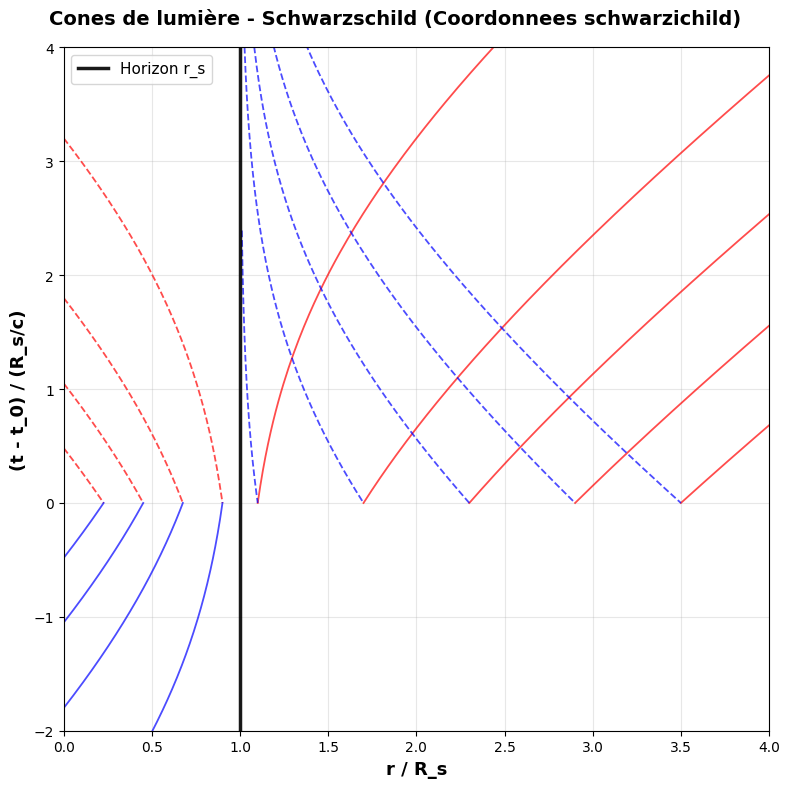

In [25]:
fig, axe = plt.subplots(figsize=(8, 8))
fig.suptitle('Cones de lumière - Schwarzschild (Coordonnees schwarzichild)', fontsize=14, fontweight='bold')

M_bh = M_sun
r_s = schwarzschild_radius(M_bh)

# Points de départ (r0, t0) décalés - pour avoir l'effet ondulant
r0_values = np.linspace(1.1*r_s, 3.5*r_s, 5)
t0 = 0
for r0 in r0_values:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace(r0, 4*r_s, 200)
    t_out = schwarzchild_geo_p(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r-', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(1.01*r_s, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b--', linewidth=1.3, alpha=0.7)

r0_values_inf = np.linspace(0.001*r_s, 0.9*r_s, 5)

for r0 in r0_values_inf:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace( 0,r0, 200)
    t_out = schwarzchild_geo_p_inf(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r--', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(0, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m_inf(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b-', linewidth=1.3, alpha=0.7)

# Horizon des événements
axe.axvline(1, color='black', linestyle='-', linewidth=2.5, alpha=0.9, label='Horizon r_s')


axe.set_xlabel('r / R_s', fontsize=13, fontweight='bold')
axe.set_ylabel('(t - t_0) / (R_s/c)', fontsize=13, fontweight='bold')
axe.set_xlim(0, 4)
axe.set_ylim(-2, 4)
axe.grid(True, alpha=0.3)
axe.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

On voit que ces coordonées ne sont pas adaptées pour décrire la géodésique entrante, car t diverge quand r approche r_s. C'est un artefact de la coordonnée t, pas une singularité physique. On introduit alors un autre systeme qui retranscrira mieux ce qui a été evoqué plus tot : les coordonnées de Eddington Finkelstein.